# Laboratori 2

### Nom i cognom: 

Els objectiu d'aquest laboratori són:

1. Aprendre a treballar amb l'histograma d'una imatge;
2. Aprendre com funciona la convolució en una i dues dimensió;
3. Familiaritzar-se amb filtres no lineals com la mediana;
4. Experimentar amb una tècnica clàssica de millora d'imatge - unsharp masking.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import skimage

Tornem a carregar unes quantes imatges i definir la funció per visualitzar-les.

In [2]:
def display_gray_256(img): 
    plt.axis('off')
    plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)

In [3]:
pout = skimage.io.imread("https://es.mathworks.com/help/images/basicimageimportprocessingandexportexample_01_es.png")
pout = pout[26:317, 83:323]
salt_and_pepper = skimage.io.imread("https://upload.wikimedia.org/wikipedia/commons/f/f4/Noise_salt_and_pepper.png")
moon = skimage.io.imread("moon.jpg")

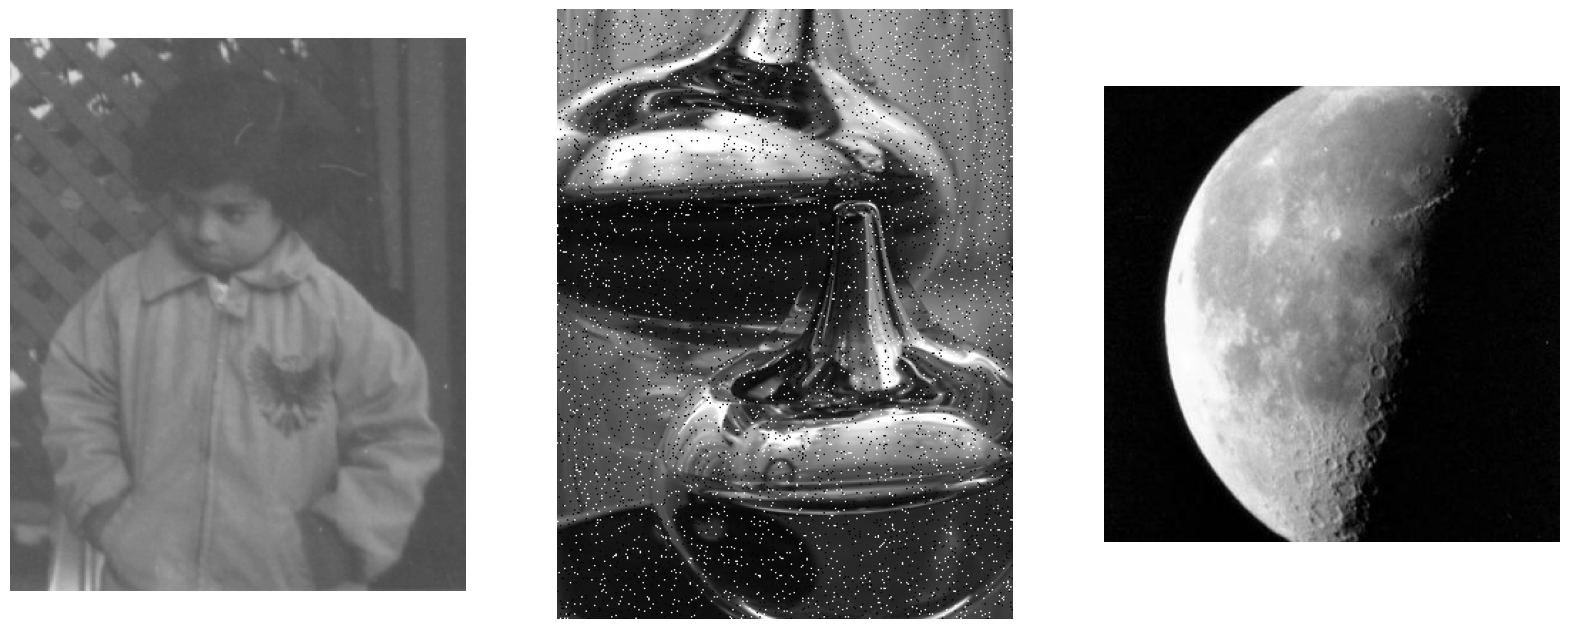

In [4]:
plt.figure(figsize = (20, 40))
plt.subplot(131)
display_gray_256(pout)
plt.subplot(132)
display_gray_256(salt_and_pepper)
plt.subplot(133)
display_gray_256(moon)

No son les imatges de millor qualitat del mon. En les tasques explorarem maneres de millorar-les.

## Tasca 1 - Equalització d'un histograma

La imatge del nen té poca varietat en els nivells de gris. La millorarem fent servir la tècnica d'equaització de l'histograma. Podeu veure l'explicació en el Vídeo 3 de Week 3 del curs de Duka a Coursera. Primer visualitzem l'histograma actual.

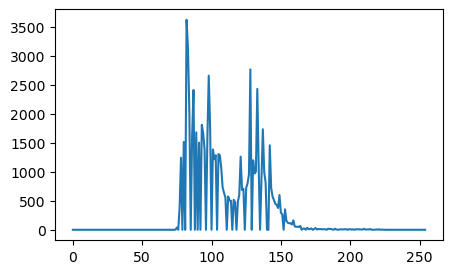

In [5]:
hist = np.histogram(pout, bins = np.arange(256))  [0]
plt.figure(figsize = (5, 3))
plt.plot(hist)

La majoria dels pixels tenen colors entre 75 i 175. Implementa la funció per canviar els colors de manera que l'histograma sigui més equilibrat.

In [6]:
def hist_equalize_256(img):
    # implementa la funció d'equalització
    return img

pout_equalized = hist_equalize_256(pout)

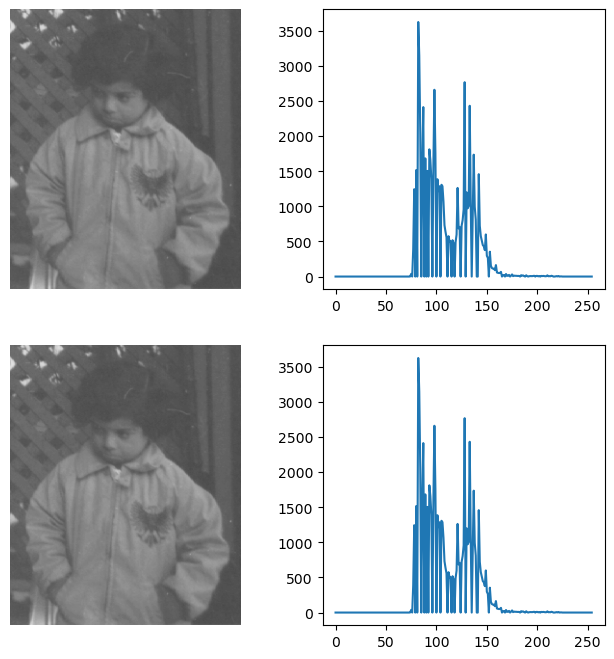

In [7]:
plt.figure(figsize = (8, 8))
plt.subplot(221)
display_gray_256(pout)
plt.subplot(222)
plt.plot(np.histogram(pout, bins = np.arange(256))[0])
plt.subplot(2,2,3)
display_gray_256(pout_equalized)
plt.subplot(2,2,4)
plt.plot(np.histogram(pout_equalized, bins = np.arange(256))[0])

## Tasca 2 - Convolució de vectors

Escriu una funcio <code>convolve</code> que donats dos vectors calcula la seva convolució. Fes servir aquesta funció per dibuixar els resultats de convolució dels dos parells de funcions d'aquesta imatge i també dels exemples que apareixen en el vídeo "LSIS and Convolution" del curs First Principles of Computer Vision. Compara els teus resultats amb els resultats d'aplicar la funció <code>np.convolve</code>.

<img src="https://ikhlestov.github.io/images/machine-learning/convolutional-layers/01_convolution-operation-example.png" width="500"/>


## Tasca 3 - Convolució en 2D

Escriu una funció <code>convolve2D</code> que faci la convolució en 2 dimensions. Aplica-la a la imatge del Sinan amb un quadrat uniforme de $5\times 5$. Compara el teu resultat amb el resultat de la funció <code>scipy.ndimage.convolve</code>. Pots fer servir el marc de $0$s o qualsevol altre. (La implementació de scipy fa servir el mark mirall.) Compara el temps que trigen les dues implementacions. A què creus que es deu la diferència? (És possibe que la segona vegada que executis la funció de la llibreria trigi $0$ms perquè el resultat es guarda en el cache.)

In [13]:
def convolve2D (f, g):
    # implementa la convolució en 2D
    

    return np.zeros(f.shape)  # pots treure el marc de manera que la mida final sigui la mateixa que f  

Tornem a carregar l'imatge del Sinan.

In [14]:
from array import array

data = array('B')

SIZE = 256
with open('sinan.IMG', 'rb') as file:
    data.fromfile(file, SIZE*SIZE)
    
imgarray = [data[s:s + SIZE] for s in np.arange(0, len(data), SIZE)]

sinan = np.array(imgarray)
sinan = sinan.astype(float)

In [15]:
import time

My implementation takes time  0.0005042552947998047
Scipy impementation takes time  0.07851862907409668


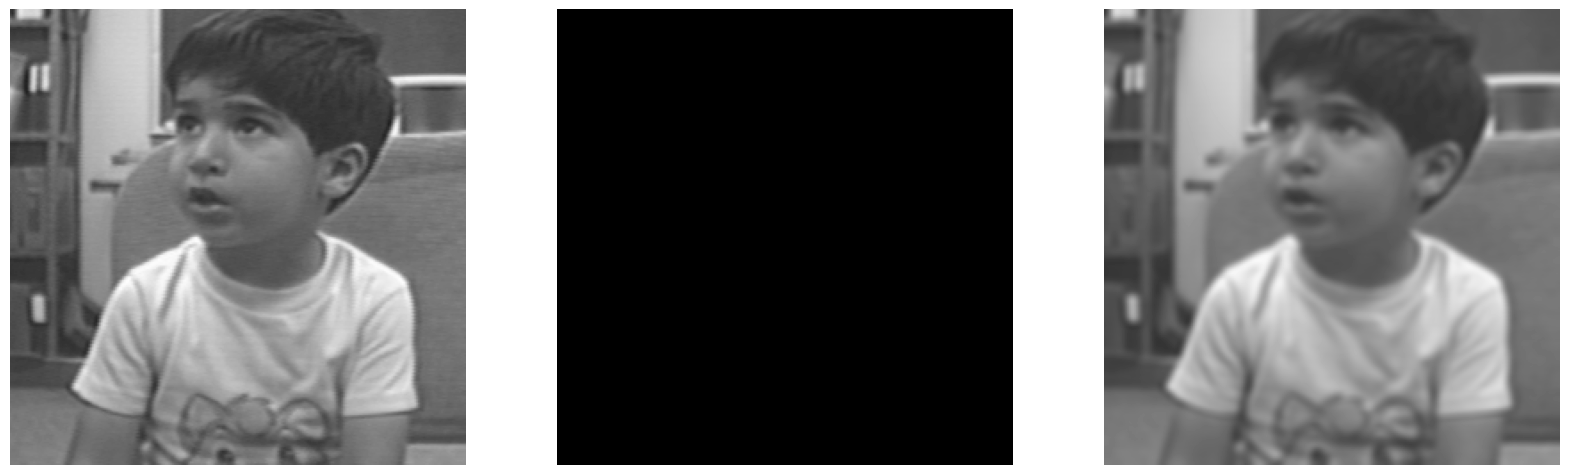

In [16]:
blur = np.ones((5, 5))/25

plt.figure(figsize = (20, 20))
plt.subplot(1,3,1)
display_gray_256(sinan)
plt.subplot(1,3,2)
start1 = time.time()
display_gray_256(convolve2D(sinan, blur))
end1 = time.time()
print("My implementation takes time ", end1-start1)

plt.subplot(1,3,3)
start2 = time.time()
display_gray_256(scipy.ndimage.convolve(sinan, blur))
end2 = time.time()
print("Scipy impementation takes time ", end2 - start2)

Hi ha més filtres que es fan servir sovint. Aquí pots visualitzar els resultats. (Per evitar que la borrera de la imatge afecti els colors de la visualització automàtica trunquem els arreys).

Troba una altra imatge amb la que podem veure més clarament la diferència entre els filtres de Sobel en dirrecció $X$ i $Y$.

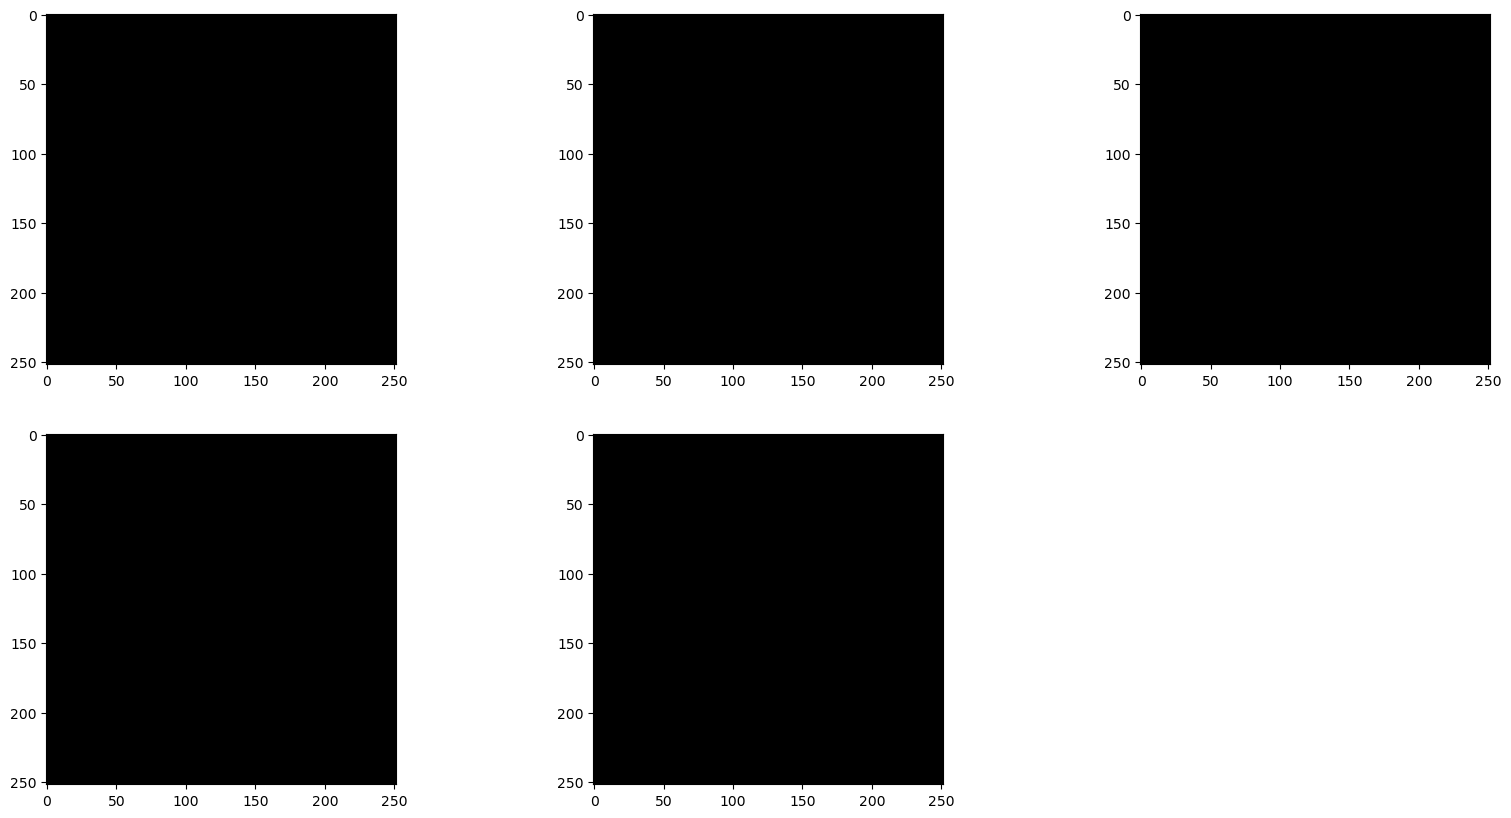

In [17]:
blur = np.ones((3,3))/9     # suavitzat
laplace = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])    # per detectar contorns
sharpening = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])  
sobelX = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])   # per detectar contorns horitzontals
sobelY = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])   # per detectar contorns verticals

kernellist = [blur, laplace, sharpening, sobelX, sobelY]

n = len(kernellist)
i = 1

plt.figure(figsize = (20, 10))
for kernel in kernellist: 
    plt.subplot(int(np.ceil(n/3)), 3, i)
    plt.imshow(convolve2D(sinan, kernel)[2:-2, 2:-2], cmap= "gray")
    #plt.imshow(scipy.ndimage.convolve(sinan, kernel)[1:-1, 1:-1], cmap= "gray")
    i=i+1
    

## Tasca 4 - Filtre de la mediana

Implementa el filtre de la median del Vídeo 9 de Week 3 del curs de Coursera.
Aquest ens servirà per treure el soroll salt-and-pepper de la imatge.

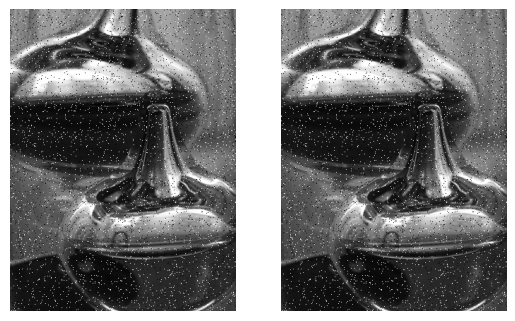

In [18]:
def median_filter (img):
    # implementa el filtre de la mediana
    return img

plt.subplot(121)
display_gray_256(salt_and_pepper)
plt.subplot(122)
display_gray_256(median_filter(salt_and_pepper))

## Tasca 5 - Filtratge "unsharp" 

Per millorar l'última imatge farem servir la tècnica de "unsharp masking" que s'ha fet servir des dels anys 1930 per millorar imatges. L'idea és generar una imatge suavitzada a partir de la origina i restar la de l'original. Això dona una imatge on es veuen només les àrees de canvi abrupt, és a dir les vores. Multipliquem les vores per un paràmetre $k>0$ i el sumem a l'imatge original. Aplica aquest mètode a les imatges de la lluna i del gat.

Aquest procés és equivalent a fer la convolució amb un filtre d'agudització (sharpening filter). Pots comprovar això visualment.

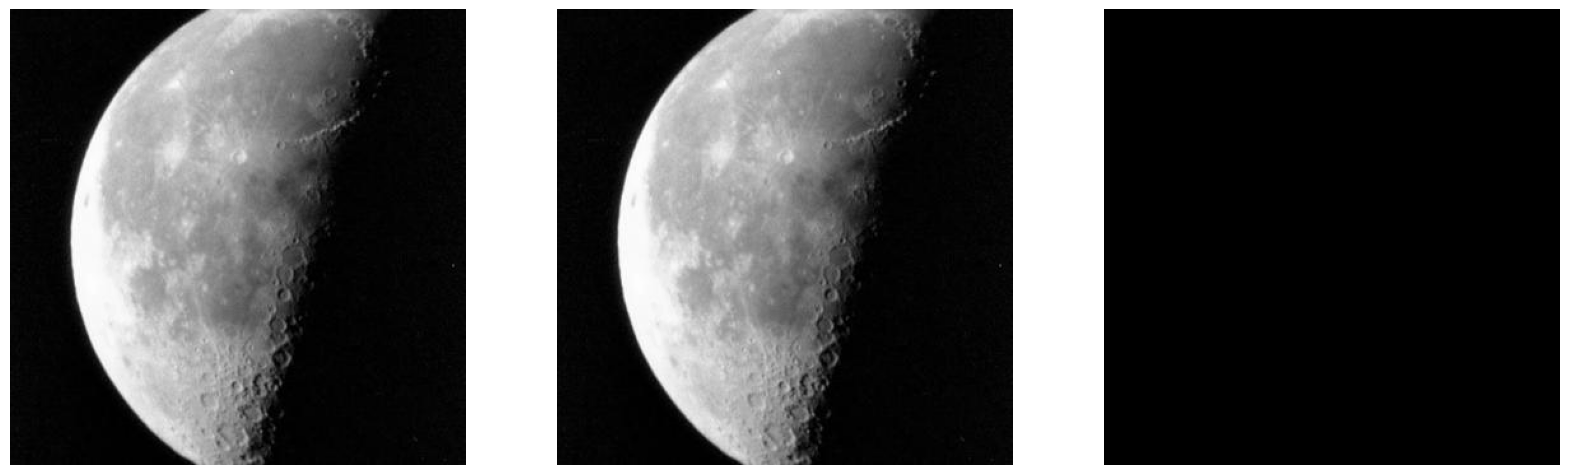

In [20]:
def unsharp_mask(img, k):
    # implemeta el filtre unsharp mask. Pots fer servir la convolució teva o la de scipy
    return img

sharpmoon = unsharp_mask(moon, k=4)

plt.figure(figsize = (20, 20))
plt.subplot(131)
display_gray_256(moon)
plt.subplot(132)
display_gray_256(sharpmoon)
plt.subplot(133)
display_gray_256(convolve2D(moon, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))[1:-1, 1:-1])  
# aquest filtre correspon a k=9 i suavització amb el filtre uniforme 3x3

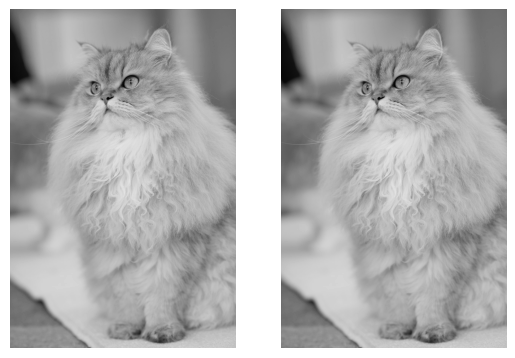

In [21]:
cat = skimage.io.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Persian_in_Cat_Cafe.jpg/1200px-Persian_in_Cat_Cafe.jpg")
cat = skimage.color.rgb2gray(cat)*255

sharpcat = unsharp_mask(cat, 30)

plt.subplot(121)
display_gray_256(cat)
plt.subplot(122)
display_gray_256(sharpcat)

## Tasca 6 - Ona quadrada

Genera una aproximació de l'ona quadrada amb $k$ sinusoides com ensenyen en el vídeo "Fourier Transform" del curs First Principles of Computer Vision. Pots buscar la descomposició per internet.  
